In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("time_series_covid19_deaths_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1645,1650,1661,1675,1687,1695,1712,1725,1737,1740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,646,657,672,685,699,716,735,743,753,771
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2206,2224,2236,2255,2272,2294,2309,2329,2352,2372
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,76,76,76,76,76,76,76,76,76,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,332,333,334,336,337,337,338,340,341,342


In [3]:
df.drop(["Province/State","Lat","Long","11/23/20","11/24/20","11/25/20","11/26/20","11/27/20"],axis=1,inplace=True)
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1595,1605,1617,1626,1638,1645,1650,1661,1675,1687
1,Albania,0,0,0,0,0,0,0,0,0,...,605,612,623,631,637,646,657,672,685,699
2,Algeria,0,0,0,0,0,0,0,0,0,...,2124,2139,2154,2168,2186,2206,2224,2236,2255,2272
3,Andorra,0,0,0,0,0,0,0,0,0,...,75,75,76,76,76,76,76,76,76,76
4,Angola,0,0,0,0,0,0,0,0,0,...,317,322,322,324,328,332,333,334,336,337


In [4]:
a=list(df)
a.remove("Country/Region")
for i in reversed(range(len(a))):
    if i!=0:
        df[a[i]]=df[a[i]]-df[a[i-1]]

In [5]:
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,4,10,12,9,12,7,5,11,14,12
1,Albania,0,0,0,0,0,0,0,0,0,...,7,7,11,8,6,9,11,15,13,14
2,Algeria,0,0,0,0,0,0,0,0,0,...,13,15,15,14,18,20,18,12,19,17
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,2,5,0,2,4,4,1,1,2,1


In [6]:
ts = pd.DataFrame(df[a].sum())

ts.index=pd.to_datetime(ts.index)
print(ts)


                0
2020-01-22     17
2020-01-23      1
2020-01-24      8
2020-01-25     16
2020-01-26     14
...           ...
2020-11-18  11323
2020-11-19  10973
2020-11-20  11840
2020-11-21   8785
2020-11-22   7081

[306 rows x 1 columns]


<AxesSubplot:>

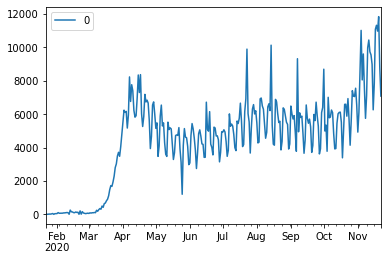

In [7]:
ts.plot()

In [8]:
len(ts)

306

In [9]:
train = ts[:291]
test = ts[291:]

In [10]:
train

,0
2020-01-22,17
2020-01-23,1
2020-01-24,8
2020-01-25,16
2020-01-26,14
...,...
2020-11-03,8451
2020-11-04,11017
2020-11-05,8051
2020-11-06,9604


In [11]:
test

,0
2020-11-08,5749
2020-11-09,7114
2020-11-10,9978
2020-11-11,10440
2020-11-12,9735
2020-11-13,9554
2020-11-14,8984
2020-11-15,6259
2020-11-16,7839
2020-11-17,11084


In [12]:
model = HWES(train, seasonal_periods=7, trend='mul', seasonal='mul')
fitted = model.fit()

C:\Users\amitb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\amitb\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\amitb\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [13]:
forecast = fitted.forecast(steps=15)


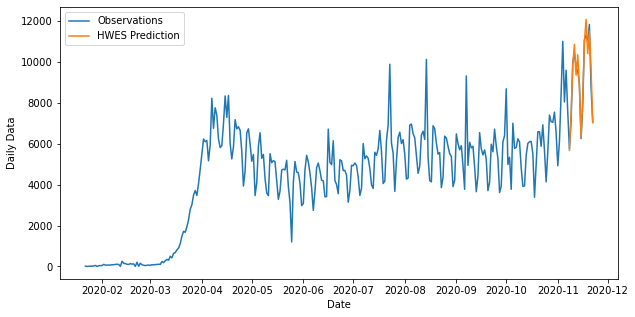

In [14]:
# pred_ci = sarimax_prediction.conf_int()
plt.figure(figsize=(10,5))
l1, = plt.plot(ts[0],label='Observations')
l2, = plt.plot(forecast,label='HWES Prediction')
plt.xlabel('Date')
plt.ylabel('Daily Data')
plt.legend(handles=[l1,l2])

In [15]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        0   No. Observations:                  291
Model:             ExponentialSmoothing   SSE                      314026579.701
Optimized:                         True   AIC                           4064.474
Trend:                   Multiplicative   BIC                           4104.881
Seasonal:                Multiplicative   AICC                          4065.789
Seasonal Periods:                     7   Date:                 Sun, 29 Nov 2020
Box-Cox:                          False   Time:                         15:48:04
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2878571                alpha                 True
smoothing_trend          

In [16]:
mean_squared_error(forecast,test)**.5

465.3981160945668